In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime, time
from django.utils import timezone
import pytz
from alive_progress import alive_bar

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 400)

In [3]:
df_FD = pd.read_pickle('df_FD_cleaned.pickle')
df_SD = pd.read_pickle('df_SD_cleaned.pickle')
df_LF = pd.read_pickle('df_LF_cleaned.pickle')

### how many time are in LF?
* how do they look? not great

In [116]:
df_LF.Time.count(), df_LF.shape[0]

(1457, 11440)

In [123]:
# these are UTM issues or incorrectly labelled periods
df_LF[df_LF.Time.isin([3,4,5])].shape[0] + df_LF[(df_LF.Time > 1200)&(df_LF.period=='AM')].shape[0]

481

In [114]:
df_LF[df_LF.Time.notnull()][['period', 'Time', 'id']].groupby(['period', 'Time']).count()

id
period Time        
AM     3.000     49
       4.000     61
       5.000     84
       835.000   12
       840.000   25
       845.000   17
       850.000   35
       900.000   36
       905.000   12
       925.000   12
       940.000   27
       1000.000  27
       1010.000  53
       1015.000  13
       1020.000  31
       1025.000  38
       1030.000  24
       1035.000  28
       1050.000  14
       1100.000  11
       1110.000  15
       1115.000  51
       1130.000  13
       1145.000  47
       1200.000  15
       1210.000  13
       1215.000  15
       1220.000  11
       1225.000  11
       1235.000  12
       1255.000  27
       1300.000  14
       1305.000  10
       1310.000  11
       1315.000  14
       1320.000  10
       1345.000  13
       1400.000  23
       1425.000  17
       1430.000  12
       1450.000  11
PM     3.000     22
       4.000     14
       5.000     27
       1355.000  13
       1400.000  39
       1405.000  24
       1425.000  12
       1445.000  49
       1455.000  56
       1500.000  22
       1530.000  11
       1540.000  11
       1545.000  16
       1550.000  22
       1605.000  15
       1625.000  16
       1630.000  13
       1640.000  10
       1655.000  17
       1700.000  15
       1713.000  12
       1745.000  16
       1755.000  14
       1850.000  17

### parsing bycatch from remarks

In [19]:
remarks_bycatch = list(df_SD[df_SD[['bycatch_sbass', 'bycatch_shad', 'bycatch_other']].any(axis=1)]['remarks'].unique())

In [95]:
remarks_ghost = list(df_SD[(df_SD.FLAG_GHOST_SAMPLE==True)|(df_SD.FLAG_AMBIGUOUS_MATCH==True)|(df_SD.FLAG_AMBIGUOUS_SAMPLE==True)]['remarks'].unique())
# remarks_ghost

In [115]:
for remarks in remarks_ghost:
    if 'bycatch' in remarks:
        print(remarks)

In [85]:
# years where bycatch notes occur
df_SD[df_SD[['bycatch_sbass', 'bycatch_shad', 'bycatch_other']].any(axis=1)].groupby('YEAR').count()['MM']

YEAR
2017    10
2018     8
2019    18
Name: MM, dtype: int64

### FD comment parsing

In [149]:
fd_remarks = list(df_FD.remarks.unique())

for _ in range(5):
    remarks = np.random.choice(fd_remarks)
    remarks = remarks + ';'

    Ager_1 = remarks.split('Ager_1' + ':')[1].split(';')[0].strip() if 'Ager_1' in remarks else None
    AGE_1 = remarks.split('AGE_1' + ':')[1].split(';')[0].strip() if 'AGE_1' in remarks else None
    FSP_1 = remarks.split('FSP_1' + ':')[1].split(';')[0].strip() if 'FSP_1' in remarks else None
    Comments_1 = remarks.split('Comments_1' + ':')[1].split(';')[0].strip() if 'Comments_1' in remarks else None
    Ager_2 = remarks.split('Ager_2' + ':')[1].split(';')[0].strip() if 'Ager_2' in remarks else None
    AGE_2 = remarks.split('AGE_2' + ':')[1].split(';')[0].strip() if 'AGE_2' in remarks else None
    FSP_2 = remarks.split('FSP_2' + ':')[1].split(';')[0].strip() if 'FSP_2' in remarks else None
    Comments_2 = remarks.split('Comments_2' + ':')[1].split(';')[0].strip() if 'Comments_2' in remarks else None
    Ager_3 = remarks.split('Ager_3' + ':')[1].split(';')[0].strip() if 'Ager_3' in remarks else None
    AGE_3 = remarks.split('AGE_3' + ':')[1].split(';')[0].strip() if 'AGE_3' in remarks else None
    FSP_3 = remarks.split('FSP_3' + ':')[1].split(';')[0].strip() if 'FSP_3' in remarks else None
    Comments_3 = remarks.split('Comments_3' + ':')[1].split(';')[0].strip() if 'Comments_3' in remarks else None
    Envelop_Comments = remarks.split('Envelop_Comments' + ':')[1].split(';')[0].strip() if 'Envelop_Comments' in remarks else None


    print(Ager_1, AGE_1, FSP_1, Comments_1, Ager_2, AGE_2, FSP_2, Comments_2, Ager_3, AGE_3, FSP_3, Comments_3, Envelop_Comments)

JM None None ?able 4-3 if BB None None None None None None None None None
JM None None NICE None None None None Jmac None None None None
JM None None BB None None None None None None None None None
None None None None None None None None None None None None None
JM None None ???able3.2 None None None None None None None None None


In [157]:
for remarks in remarks_bycatch:
    
    print('REMARK: ', remarks)
    
    remarks = remarks + ';'

    bycatch_sbass = remarks.split('bycatch_sbass' + ':')[1].split(';')[0].strip() if 'bycatch_sbass' in remarks else None
    bycatch_shad = remarks.split('bycatch_shad' + ':')[1].split(';')[0].strip() if 'bycatch_shad' in remarks else None
    bycatch_other = remarks.split('bycatch_other' + ':')[1].split(';')[0].strip() if 'bycatch_other' in remarks else None
    remarks = remarks.split('bycatch')[0].replace(';', '') if remarks else None

    print(bycatch_sbass)
    print(bycatch_shad)
    print(bycatch_other)
    print(remarks)
    print()

REMARK:  striped bass were 23 inches; bycatch_sbass: 3
3
None
None
striped bass were 23 inches 

REMARK:  bycatch_sbass: 1
1
None
None


REMARK:  catch a salmon no marking 14 inch long; bycatch_other: salmon
None
None
salmon
catch a salmon no marking 14 inch long 

REMARK:  bycatch_sbass: 3
3
None
None


REMARK:  bycatch_sbass: 2
2
None
None


REMARK:  salted 5000 lbs; bycatch_sbass: 1
1
None
None
salted 5000 lbs 

REMARK:  salted 8000 lbs; bycatch_sbass: 1; bycatch_other: 1 perch, 1 speckled trou, 1 30 inch salmon
1
None
1 perch, 1 speckled trou, 1 30 inch salmon
salted 8000 lbs 

REMARK:  bycatch_other: 1 lamprey eel (?)
None
None
1 lamprey eel (?)


REMARK:  Rainbow trout released; bycatch_other: 1
None
None
1
Rainbow trout released 

REMARK:  trout; bycatch_other: 1
None
None
1
trout 

REMARK:  salmon; bycatch_other: 1
None
None
1
salmon 

REMARK:  bycatch_other: 1 perch
None
None
1 perch


REMARK:  bycatch_other: 1 trout
None
None
1 trout


REMARK:  bycatch_other: 4 suckers
None
N

### week property

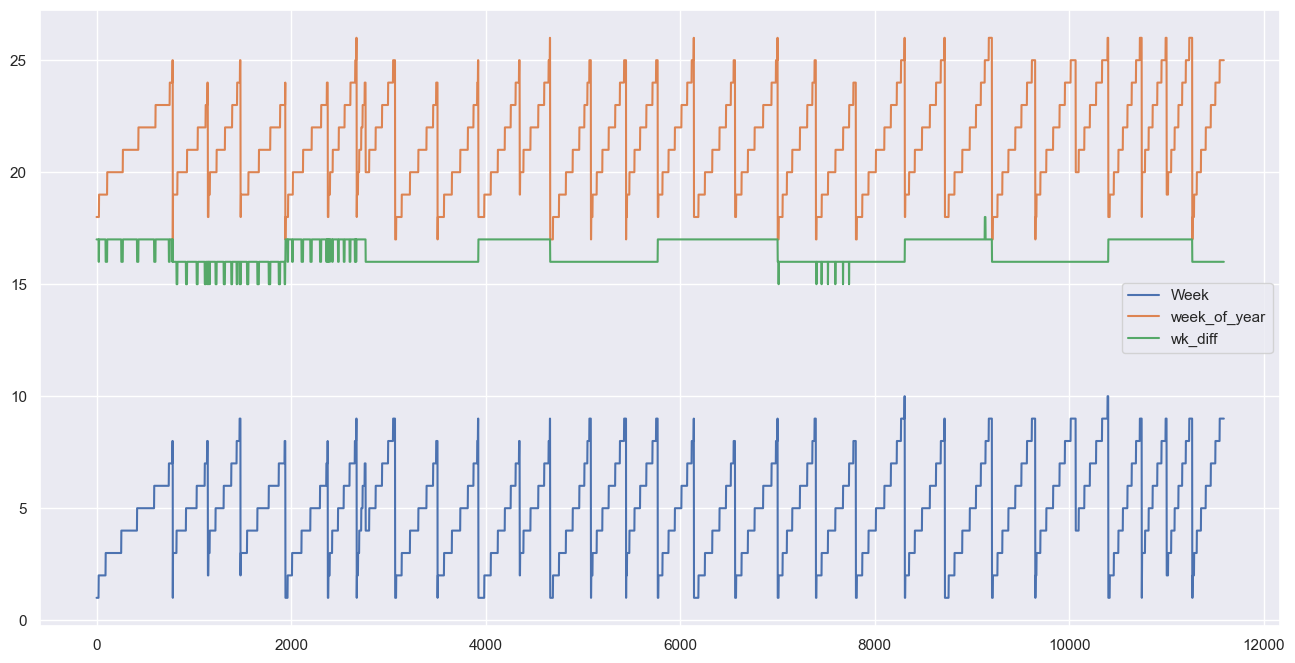

In [60]:
# what is 'week'?
temp = df_SD[['Week']].copy()
temp.loc[:, 'week_of_year'] = df_SD.DATETIME.dt.strftime('%W')
temp = temp[temp.Week.notna()].astype(int).reset_index(drop=True)
temp['wk_diff'] = temp['week_of_year'] - temp['Week']
temp.plot(figsize=(16,8));

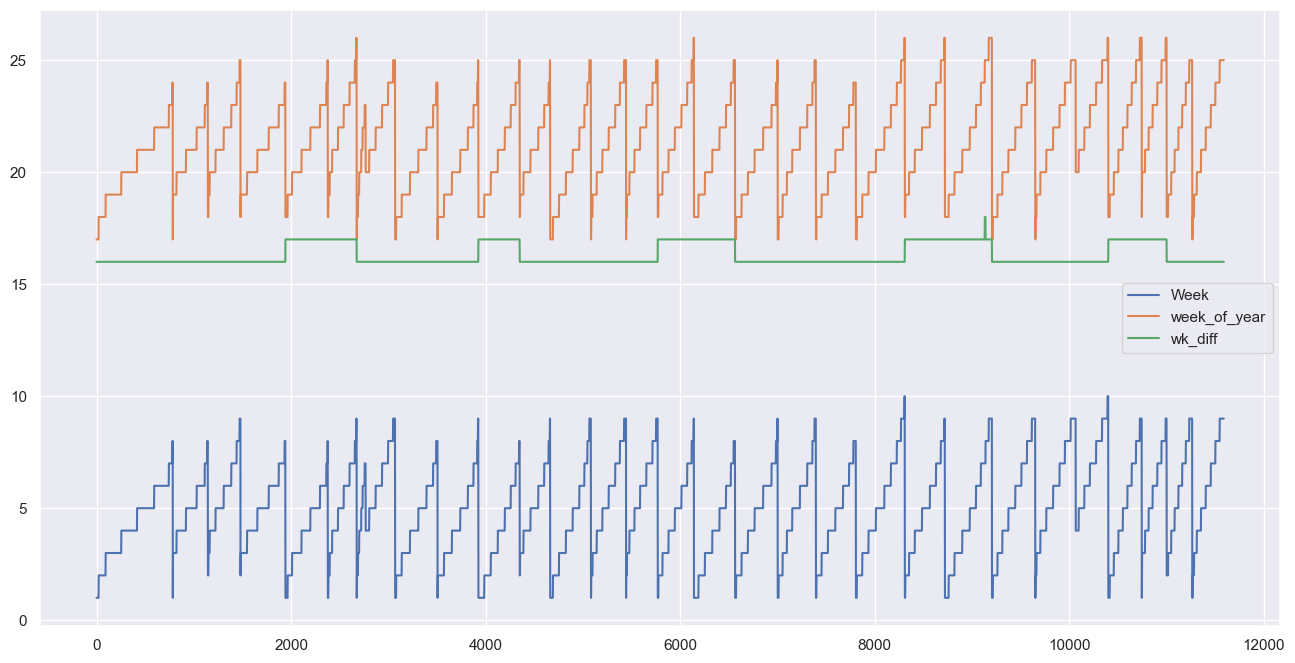

In [75]:
# what is 'week'?
temp = df_SD[['YEAR', 'Week']].copy()
temp.loc[:, 'week_of_year'] = df_SD.DATETIME.dt.strftime('%U')  # Sunday works a bit better, but not 100%
temp = temp[temp.Week.notna()].astype(int).reset_index(drop=True)
temp['wk_diff'] = temp['week_of_year'] - temp['Week']
temp.drop('YEAR', axis=1).plot(figsize=(16,8));

In [69]:
# if they always started on week 1, it would be easier
df_SD.DATETIME.dt.strftime('%U').astype('Int64').min()

16

In [83]:
temp2 = temp.groupby('YEAR').min()[['Week', 'week_of_year']]
temp2['subtract_weeks'] = temp2['week_of_year'] - temp2['Week']
temp2.reset_index()[['YEAR', 'subtract_weeks']].sort_values(['subtract_weeks', 'YEAR'])

,YEAR,subtract_weeks
0,1990,16
1,1991,16
2,1992,16
3,1993,16
6,1996,16
7,1997,16
8,1998,16
9,1999,16
11,2001,16
12,2002,16


In [118]:
def week(wk, yr):
    if yr in [1994, 1995, 2000, 2005, 2006, 2011, 2012, 2016, 2017]:
        return wk - 17
    else:
        return wk - 16


In [132]:
# testing that this property works

for _ in range(100):
    tempdate = df_SD.sample().DATETIME
    iso_week, YEAR = tempdate.dt.strftime('%U').values[0], tempdate.dt.year.values[0]
    if df_SD[(df_SD.DATETIME.dt.strftime('%U')==iso_week)&(df_SD.DATETIME.dt.year==YEAR)]['Week'].any():
        print(
            week(int(iso_week), YEAR),
            df_SD[(df_SD.DATETIME.dt.strftime('%U')==iso_week)&(df_SD.DATETIME.dt.year==YEAR)]['Week'].min(), 
            df_SD[(df_SD.DATETIME.dt.strftime('%U')==iso_week)&(df_SD.DATETIME.dt.year==YEAR)]['Week'].max()
        )

5 5 5
7 7 7
5 5 5
4 4 4
3 3 3
8 8 8
3 3 3
3 3 3
3 3 3
4 4 4
4 4 4
5 5 5
9 9 9
6 6 6
5 5 5
5 5 5
3 3 3
5 5 5
6 6 6
5 5 5
5 5 5
2 2 2
3 3 3
2 2 2
4 4 4
7 7 7
8 8 8
5 5 5
5 5 5
2 2 2
5 5 5
8 8 8
4 4 4
4 4 4
3 3 3
6 6 6
8 8 8
2 2 2
7 7 7
3 3 3
7 7 7
3 3 3
9 9 9
2 2 2
5 5 5
6 6 6
5 5 5
7 7 7
4 4 4
5 5 5
7 7 7
7 7 7
6 6 6
8 8 8
3 3 3
4 4 4
7 7 7
7 7 7
9 9 9
5 5 5
3 3 3
2 2 2
1 1 1
5 5 5
4 4 4
9 9 9
3 3 3
6 6 6
5 5 5
3 3 3
4 4 4
6 6 6
6 6 6
5 5 5
3 3 3
3 3 3
2 2 2
2 2 2
4 4 4
